## Constructing Models in Keras

### Introduction to Models

Two types of models available in Keras

![Models](Images/03_01.jpg) 

- Sequential Model
    - Easy to understand, can easily and quickly create a neural network
    - Define a sequential model and then add a sequence of layers
    - Connections between the layers are automatically made and managed


- Model Class with Functional API
    - Composed of arranged layers of functional units
    - User-defined layer connection between the units to create the best solution
    - More detailed neural network with enough power to solve complex problems
    



------

--------

## Coding Complex Data

### deep_circles.py

Defines a network that can find separate circles of data

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

### Helper Functions

#### Plotting the Data on the Figure 

In [2]:
def plot_data(pl, X, y):
    
    # plot class where y==0
    pl.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    
    # plot class where y==1
    pl.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    
    pl.legend(['0', '1'])
    
    return pl

#### Drawing Decision Boundaries

In [3]:
def plot_decision_boundary(model, X, y):
    
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model
    c = model.predict(ab)
    
    # reshape the output so contourf can plot it
    Z = c.reshape(aa.shape)
    
    plt.figure(figsize=(12, 8))
    
    # plot the contour instead of just the line
    # allows us to see the confidence of the prediction
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    
    # plot the moons of data
    plot_data(plt, X, y)
    
    return plt

### Generating Data Circles



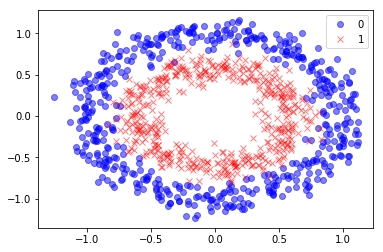

In [4]:
X, y = make_circles(n_samples=1000, factor=.6, \
                    noise=0.1, random_state=42)

pl = plot_data(plt, X, y)
pl.show()

### Splitting Data into Training and Testing Sets

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Creating the Keras Model

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(1, input_shape=(2,), activation="sigmoid"))


# Compile and fit the model
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, verbose=1)

Using TensorFlow backend.


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/100
700/700 [==============================] - 0s 365us/step - loss: 0.7127 - acc: 0.5457
Epoch 2/100
700/700 [==============================] - 0s 43us/step - loss: 0.6956 - acc: 0.4829
Epoch 3/100
700/700 [==============================] - 0s 47us/step - loss: 0.6940 - acc: 0.5414
Epoch 4/100
700/700 [==============================] - 0s 48us/step - loss: 0.6956 - acc: 0.5729
Epoch 5/100
700/700 [==============================] - 0s 46us/step - loss: 0.6944 - acc: 0.5300
Epoch 6/100
700/700 [==============================] - 0s 44us/step - loss: 0.6947 - acc: 0.4386
Epoch 7/100
700/700 [==============================] - 0s 45us/step - loss: 0.6948 - acc: 0.5357
Epoch 8/100
700/700 [==============================] - 0s 44us/step - loss: 0.6944 - acc: 0.5757
Epoch 9/100
700/700 [==============================] - 0s 45us/step - loss: 0.6946 - acc: 0.5514
Epoch 10/100
700/700 [==============================]

700/700 [==============================] - 0s 42us/step - loss: 0.6942 - acc: 0.5343
Epoch 82/100
700/700 [==============================] - 0s 43us/step - loss: 0.6951 - acc: 0.4514
Epoch 83/100
700/700 [==============================] - 0s 40us/step - loss: 0.6943 - acc: 0.5400
Epoch 84/100
700/700 [==============================] - 0s 42us/step - loss: 0.6958 - acc: 0.5271
Epoch 85/100
700/700 [==============================] - 0s 45us/step - loss: 0.6952 - acc: 0.4843
Epoch 86/100
700/700 [==============================] - 0s 44us/step - loss: 0.6956 - acc: 0.5529
Epoch 87/100
700/700 [==============================] - 0s 44us/step - loss: 0.6962 - acc: 0.5029
Epoch 88/100
700/700 [==============================] - 0s 42us/step - loss: 0.6942 - acc: 0.5386
Epoch 89/100
700/700 [==============================] - 0s 43us/step - loss: 0.6962 - acc: 0.4429
Epoch 90/100
700/700 [==============================] - 0s 43us/step - loss: 0.6959 - acc: 0.5643
Epoch 91/100
700/700 [===========

### Get Loss and Accuracy

In [7]:
eval_result = model.evaluate(X_test, y_test)
print("\n\nTest loss:", eval_result[0], "\nTest accuracy:", eval_result[1])

300/300 [==============================] - 0s 75us/step


Test loss: 0.6968460845947265 
Test accuracy: 0.48


### Plot the Decision Boundary

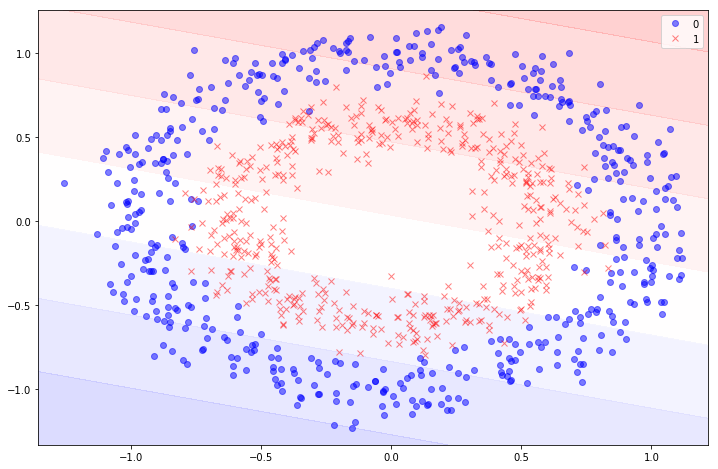

In [8]:
# Plot the decision boundary
plot_decision_boundary(model, X, y).show()

**This data is not linearly separable, so we have to use a different approach.** Fitting a plane through this data only leads to about 50% accuracy.

------

-------


## Estimating Layers and Neurons

### Rules of Thumb for Starting Number of Hidden Layers

Unfortunately, there are no absolute rules since the best values are related to the data and how much training is done with the data.

[Guidelines](http://www.heatonresearch.com/2017/06/01/hidden-layers.html) come from Jeff Heaton



![Layers](Images/03_02.jpg) 

For our data, more than two layers is probably overkill.


-----


### Rules of Thumb for Starting Number of Neurons in Hidden Layers


![Neurons](Images/03_03.jpg) 

Our input contains two values, the x and y for each item's position, and the output size is 1, the class 0 or 1 of each item. Applying these rules, we get starting points ranging from 2 to 4 neurons. 

More neurons are usually better until the network starts overfitting the data.

We are going to start with 4 neurons for each of our 2 hidden layers.


-------



## Implementing Layers and Neurons

Since we are using the sequential model, adding these layers is easy. 

The first layer must define the size of the input data. Once we do that, the sequential model will infer the input sizes of the remaining layers. So we move the input size to the new first layer.



In [9]:
model = Sequential()

model.add(Dense(4, input_shape=(2,), activation="tanh"))
model.add(Dense(4, activation="tanh"))

model.add(Dense(1, activation='sigmoid'))

# Compile and fit the model
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
700/700 [==============================] - 0s 569us/step - loss: 0.6858 - acc: 0.6057
Epoch 2/100
700/700 [==============================] - 0s 51us/step - loss: 0.6582 - acc: 0.6614
Epoch 3/100
700/700 [==============================] - 0s 51us/step - loss: 0.5914 - acc: 0.7186
Epoch 4/100
700/700 [==============================] - 0s 53us/step - loss: 0.4164 - acc: 0.8600
Epoch 5/100
700/700 [==============================] - 0s 51us/step - loss: 0.2419 - acc: 0.9443
Epoch 6/100
700/700 [==============================] - 0s 56us/step - loss: 0.1468 - acc: 0.9657
Epoch 7/100
700/700 [==============================] - 0s 52us/step - loss: 0.1227 - acc: 0.9557
Epoch 8/100
700/700 [==============================] - 0s 54us/step - loss: 0.1073 - acc: 0.9657
Epoch 9/100
700/700 [==============================] - 0s 54us/step - loss: 0.1060 - acc: 0.9557
Epoch 10/100
700/700 [==============================] - 0s 51us/step - loss: 0.0705 - acc: 0.9800
Epoch 11/100
700/700 [======

700/700 [==============================] - 0s 51us/step - loss: 0.0571 - acc: 0.9800
Epoch 85/100
700/700 [==============================] - 0s 51us/step - loss: 0.0559 - acc: 0.9800
Epoch 86/100
700/700 [==============================] - 0s 57us/step - loss: 0.0594 - acc: 0.9786
Epoch 87/100
700/700 [==============================] - 0s 54us/step - loss: 0.0621 - acc: 0.9800
Epoch 88/100
700/700 [==============================] - 0s 54us/step - loss: 0.0989 - acc: 0.9643
Epoch 89/100
700/700 [==============================] - 0s 50us/step - loss: 0.0616 - acc: 0.9743
Epoch 90/100
700/700 [==============================] - 0s 47us/step - loss: 0.0620 - acc: 0.9757
Epoch 91/100
700/700 [==============================] - 0s 47us/step - loss: 0.0849 - acc: 0.9629
Epoch 92/100
700/700 [==============================] - 0s 51us/step - loss: 0.0685 - acc: 0.9729
Epoch 93/100
700/700 [==============================] - 0s 51us/step - loss: 0.0617 - acc: 0.9686
Epoch 94/100
700/700 [===========

### Get Loss and Accuracy

In [10]:
eval_result = model.evaluate(X_test, y_test)
print("\n\nTest loss:", eval_result[0], "\nTest accuracy:", eval_result[1])

300/300 [==============================] - 0s 119us/step


Test loss: 0.14755309104919434 
Test accuracy: 0.9333333333333333


### Plot the Decision Boundary

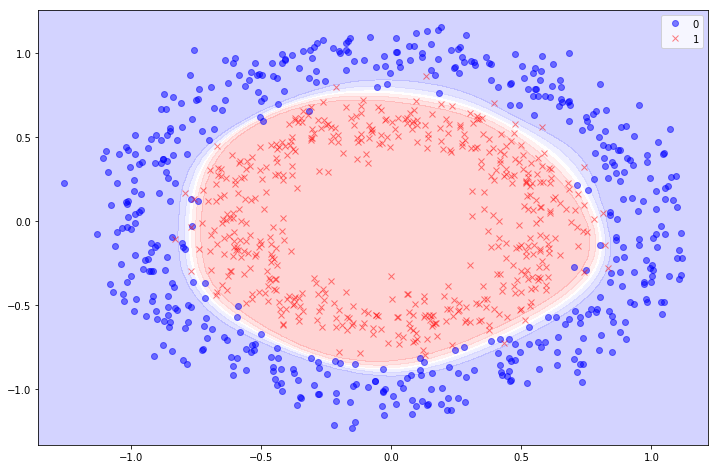

In [11]:
plot_decision_boundary(model, X, y).show()

-----

-------

## Model Features

The Keras model has a lot of features which are well documented at [keras.io](https://keras.io/).

It is helpful to visualize the model structure and how data moves through it. 



### Visualization Methods

**summary ( )** provides a summary of the model showing all of the layers in sequence, the layer type, shape of the data the layer produces, and the number of trainable parameters in the layer. Can be very useful to ensure we are building the model we expect.


**Plot_model ( )** produces a graphical depiction of the model hierarchy, showing each layer and the connections between layers. It creates a graphical file that can be used in presentations and included in documents. 



![Visualization](Images/03_04.jpg) 

In [ ]:
model = Sequential()

model.add(Dense(4, input_shape=(2,), activation='tanh', name='Hidden-1'))
model.add(Dense(4, activation='tanh', name='Hidden-2'))
model.add(Dense(1, activation='sigmoid', name='Output_layer'))

model.summary()

# Compile and fit the model
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

model.fit(X_train, y_train, epochs=100, verbose=0)

**Summary** the number of trainable parameters is a key metric for determining the complexity of your model.

![Visualization](Images/03_05.jpg) 


**Plot_model** creates a .png file. It shows a graphical display of the model from input to output. Also shows each layer type and the shape of the input and the output data.

![Plot_model](Images/03_06.jpg) 

-------


### Callback Functions

At key points in the training process, a Keras model can call functions that have access to the inner state and statistics of the model.

Keras has an API that allows developers to create their own callbacks. 



![Callbacks](Images/03_07.jpg) 

-----

### Adding an early stopping callback to our model

This callback will stop the training when the parameter we specify stops improving. This lets us specify that the training should run for a large number of epochs and have the model terminate itself if the parameter stops improving. 

The patience parameter=5 signifies that if we do not see the validation accuracy ("real world accuracy") of this set proven for 5 consecutive epochs, the training should stop.

Having a list of callbacks makes it easy to have multiple callbacks.

In [12]:
from keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(4, input_shape=(2, ), activation='tanh', name='Hidden-1'))
model.add(Dense(4, activation='tanh', name='Hidden-2'))
model.add(Dense(1, activation='sigmoid', name='output_layer'))

model.summary()

model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])


# Defining early stopping callback
early_callback = [EarlyStopping(monitor='val_acc', patience=5, mode='max')]

model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=early_callback, validation_data=(X_test, y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-1 (Dense)             (None, 4)                 12        
_________________________________________________________________
Hidden-2 (Dense)             (None, 4)                 20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 0s 625us/step - loss: 0.6969 - acc: 0.5171 - val_loss: 0.6821 - val_acc: 0.5967
Epoch 2/100
700/700 [==============================] - 0s 61us/step - loss: 0.6515 - acc: 0.6971 - val_loss: 0.6092 - val_acc: 0.7033
Epoch 3/100
700/700 [==============================] - 0s 61us/step - loss: 0.4853 - acc: 0.822

300/300 [==============================] - 0s 28us/step


Test Loss:  0.15783605781694254 
Test Accuracy:  0.93


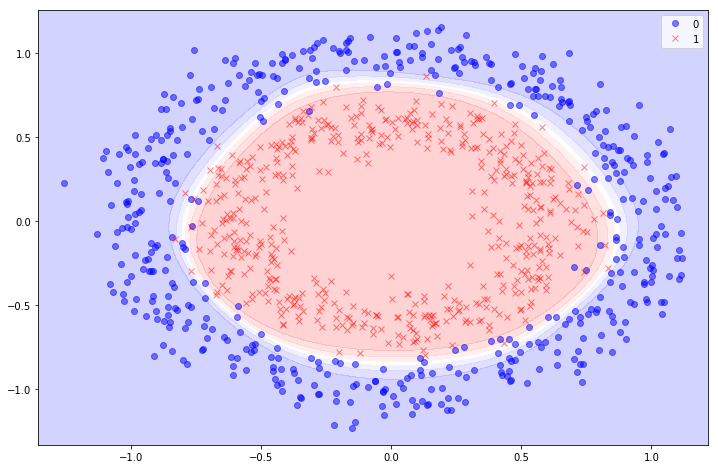

In [13]:
# Loss and Accuracy
eval_result = model.evaluate(X_test, y_test)
print("\n\nTest Loss: ", eval_result[0], "\nTest Accuracy: ", eval_result[1])


# Plotting the Decision Boundary
plot_decision_boundary(model, X, y).show()

--------

### Saving and Restoring



Can use .save and .load_model to save our trained model and later restore our trained model in a service or applications to make predictions on new data. 

![Save](Images/03_08.jpg) 



.model_to_json and .model_to_yaml will just save the layer structural architecture without weights or compile settings to a JSON or yaml string. 

.model_from_json and .model_from_yaml create a new model with the layer structure from the passed JSON or yaml string, ready to be compiled and trained.

Both yaml and JSON are human readable strings, so you can use these to inspect and alter the architecture of the model by changing layers. 

![json_yaml](Images/03_09.jpg) 

.save_weights saves just the model's current weights to an HDF5 file. 

.load_weights restores the weights from the contents of an HDF5 file. This assumes the architecture of the model is the same.

With .load_weights we can specify the byname=True parameter to load the weights into layers with the matching name, regardless of whether the architecture is the same.


![save_weights](Images/03_10.jpg) 

--------

----------

## Converting to the Functional API